# Bike Share Case Study
Author: Brent Artuch <br>
Date: 2023-06-10

## Introduction

This is one of the capstone projects from the Google Data Analytics certification on Coursera. I used the Python platform
to conduct the case study because I am most proficient with Pandas and Seaborn for data cleaning and visualization.
The data set used for this case study was provided by the certification instructors. <br>

In this scenario, a fictional bike share company wants to establish techniques for improving membership purchases by
casual users. The client wishes to gain more insights regarding what time the casual user like to use their service,
on what days of the week, and during which times of the year.

## Step 1: Imports


### Import libraries

In [1]:
import pandas as pd
import seaborn as sns

### Load the dataset
The datasets are csv files containing bike share statistics from Q1-Q4 of 2019. (The data is fictional)

In [2]:
q1_2019 = pd.read_csv("datasets/Divvy_Trips_2019_Q1.csv")
q2_2019 = pd.read_csv("datasets/Divvy_Trips_2019_Q2.csv")
q3_2019 = pd.read_csv("datasets/Divvy_Trips_2019_Q3.csv")
q4_2019 = pd.read_csv("datasets/Divvy_Trips_2019_Q4.csv")

## Step 2: Data Cleaning
Compare the columns of the datasets to determine if they can be merged.

In [3]:
print("Q1 columns: ", q1_2019.columns, "\n")
print("Q2 columns: ", q2_2019.columns, "\n")
print("Q3 columns: ", q3_2019.columns, "\n")
print("Q4 columns: ", q4_2019.columns, "\n")

Q1 columns:  Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object') 

Q2 columns:  Index(['01 - Rental Details Rental ID', '01 - Rental Details Local Start Time',
       '01 - Rental Details Local End Time', '01 - Rental Details Bike ID',
       '01 - Rental Details Duration In Seconds Uncapped',
       '03 - Rental Start Station ID', '03 - Rental Start Station Name',
       '02 - Rental End Station ID', '02 - Rental End Station Name',
       'User Type', 'Member Gender',
       '05 - Member Details Member Birthday Year'],
      dtype='object') 

Q3 columns:  Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object') 

Q4 columns:  Index(['trip_id', 'start_time', 'end_t

#### Update the columns of `q2_2019` so that they match the columns of the other datasets.

In [4]:
q2_2019.columns = ['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear']

# Confirm change.
print("Q2 columns: ", q2_2019.columns)

Q2 columns:  Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


#### Use the `len()` function to determine the combined row count of the four datasets.

In [5]:
quarters_rows = len(q1_2019) + len(q2_2019) + len(q3_2019) + len(q4_2019)
print("Sum of rows among quarters: ", quarters_rows)

Sum of rows among quarters:  3818004


#### Combine the datasets into one `all_trips` dataset.

In [6]:
all_trips0 = pd.concat([q1_2019,q2_2019,q3_2019,q4_2019])
# Can revert back to `all_trips0` further down the line if necessary.
all_trips = all_trips0.copy()
all_trips.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


#### Confirm the size of `all_trips` matches the sum of rows among quarters.

In [7]:
all_trips.shape[0] == quarters_rows

True

#### Get info about the columns and data types.

In [8]:
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818004 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 378.7+ MB


## Step 3: Data Exploration
Remove columns that are irrelevant to analysis.

In [9]:
all_trips.drop(['birthyear', 'gender','bikeid','trip_id','from_station_id','to_station_id'], axis=1, inplace=True)
all_trips.head()

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype
0,2019-01-01 00:04:37,2019-01-01 00:11:07,390.0,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,441.0,State St & Randolph St,Dearborn St & Van Buren St (*),Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,829.0,Racine Ave & 18th St,Western Ave & Fillmore St (*),Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,"1,783.0",California Ave & Milwaukee Ave,Clark St & Elm St,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,364.0,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,Subscriber


#### Check the characteristics of the `usertype` column since the goal of this analysis is to determine characteristics of casual users.

In [10]:
print(all_trips['usertype'].describe())
all_trips.usertype.unique()

count        3818004
unique             2
top       Subscriber
freq         2937367
Name: usertype, dtype: object


array(['Subscriber', 'Customer'], dtype=object)

#### Update the names of the `usertype` entries to `member` and `subscriber` for clarity.

In [11]:
all_trips['usertype'].replace({"Customer": "casual", "Subscriber": "member"}, inplace=True)
print(all_trips['usertype'].describe())
all_trips.usertype.unique()

count     3818004
unique          2
top        member
freq      2937367
Name: usertype, dtype: object


array(['member', 'casual'], dtype=object)

#### Check `tripduration` for outliers.

In [12]:
# Remove any commas from the numbers, convert them to floats, and then suppress scientific notation.
all_trips['tripduration'] = all_trips['tripduration'].str.replace(',','')
all_trips['tripduration'] = all_trips['tripduration'].astype(float)
all_trips['tripduration'].describe().apply(lambda x: format(x, 'f'))

count     3818004.000000
mean         1450.203462
std         29854.143115
min            61.000000
25%           411.000000
50%           709.000000
75%          1283.000000
max      10628400.000000
Name: tripduration, dtype: object

#### There seems to be an extremely high `tripduration` value, so will investigate.

In [13]:
all_trips[all_trips['tripduration'] >1_000_000]

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype
19374,2019-01-05 12:02:09,2019-01-19 18:01:51,1231180.0,Wabash Ave & Roosevelt Rd,Fairbanks Ct & Grand Ave,member
70751,2019-01-16 08:58:05,2019-02-05 19:12:07,1764840.0,McClurg Ct & Erie St,State St & Kinzie St,casual
84098,2019-01-18 16:55:57,2019-02-06 08:02:57,1609620.0,Damen Ave & Leland Ave,Damen Ave & Leland Ave,member
86090,2019-01-20 10:47:56,2019-02-19 11:02:35,2592880.0,LaSalle Dr & Huron St (*),DIVVY Map Frame B/C Station,member
88324,2019-01-21 23:07:19,2019-03-28 08:30:17,5646180.0,Wentworth Ave & 63rd St,Wentworth Ave & Cermak Rd (Temp),member
...,...,...,...,...,...,...
549029,2019-12-01 03:36:44,2019-12-20 16:19:58,1687393.0,Ogden Ave & Roosevelt Rd,Pulaski Rd & Lake St,casual
560613,2019-12-03 11:12:34,2020-01-10 01:06:36,3246842.0,Federal St & Polk St,Prairie Ave & Garfield Blvd,casual
580270,2019-12-05 17:40:50,2019-12-30 14:19:59,2147948.0,Orleans St & Merchandise Mart Plaza,University Ave & 57th St,casual
630636,2019-12-14 12:21:03,2020-01-06 13:46:17,1992314.0,Austin Blvd & Lake St,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),casual


#### These `tripduration`s are legitimate from observing the corresponding `start_time` and `end_time` values.

#### Convert the time based columns from string to datetime for calendar based analysis.

In [14]:
all_trips['start_time'] = pd.to_datetime(all_trips['start_time'])
all_trips['end_time'] = pd.to_datetime(all_trips['end_time'])
all_trips[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818004 entries, 0 to 704053
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   start_time  datetime64[ns]
 1   end_time    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 87.4 MB


#### Check the dataset for any missing entries.

In [15]:
all_trips.isna().sum()

start_time           0
end_time             0
tripduration         0
from_station_name    0
to_station_name      0
usertype             0
dtype: int64

#### Create three new columns called `month_name`, `weekday`, and `hour` derived from the datetime of the `start_time` column.

In [16]:
all_trips['month_name'] = all_trips['start_time'].dt.month_name()
all_trips['weekday'] = all_trips['start_time'].dt.day_name()
all_trips['hour'] = all_trips['start_time'].dt.hour
all_trips.head()

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,month_name,weekday,hour
0,2019-01-01 00:04:37,2019-01-01 00:11:07,390.0,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,member,January,Tuesday,0
1,2019-01-01 00:08:13,2019-01-01 00:15:34,441.0,State St & Randolph St,Dearborn St & Van Buren St (*),member,January,Tuesday,0
2,2019-01-01 00:13:23,2019-01-01 00:27:12,829.0,Racine Ave & 18th St,Western Ave & Fillmore St (*),member,January,Tuesday,0
3,2019-01-01 00:13:45,2019-01-01 00:43:28,1783.0,California Ave & Milwaukee Ave,Clark St & Elm St,member,January,Tuesday,0
4,2019-01-01 00:14:52,2019-01-01 00:20:56,364.0,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member,January,Tuesday,0


#### Mask `all_trips` to just show only the entries of the casual `usertype`.

In [17]:
casual_trips = all_trips[all_trips['usertype']=="casual"]
casual_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880637 entries, 13 to 704043
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_time         880637 non-null  datetime64[ns]
 1   end_time           880637 non-null  datetime64[ns]
 2   tripduration       880637 non-null  float64       
 3   from_station_name  880637 non-null  object        
 4   to_station_name    880637 non-null  object        
 5   usertype           880637 non-null  object        
 6   month_name         880637 non-null  object        
 7   weekday            880637 non-null  object        
 8   hour               880637 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 67.2+ MB


## Step 4: Analysis and Visualization
Group entries by their `month_name` and aggregate the usertype count to get the number of casual user trips each month.

In [18]:
monthly_counts = casual_trips.groupby(['month_name'])['usertype'].count().sort_values(ascending=False).reset_index()
monthly_counts.head()

,month_name,usertype
0,August,186889
1,July,175632
2,June,130218
3,September,129173
4,May,81624


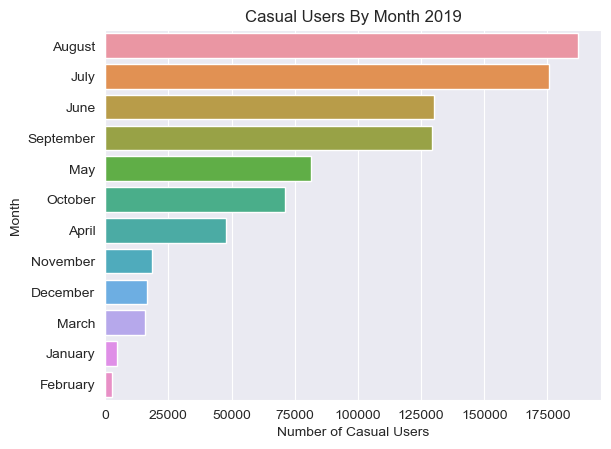

In [19]:
fig = sns.barplot(
       data=monthly_counts,
       y='month_name',
       x='usertype',
)
fig.set(
       title="Casual Users By Month 2019",
       ylabel="Month",
       xlabel="Number of Casual Users"
);

#### Now Group by `weekday`.

In [20]:
weekday_counts = casual_trips.groupby(['weekday'])['usertype'].count().sort_values(ascending=False).reset_index()
weekday_counts.head()

,weekday,usertype
0,Saturday,208056
1,Sunday,170179
2,Friday,121141
3,Monday,101489
4,Thursday,101372


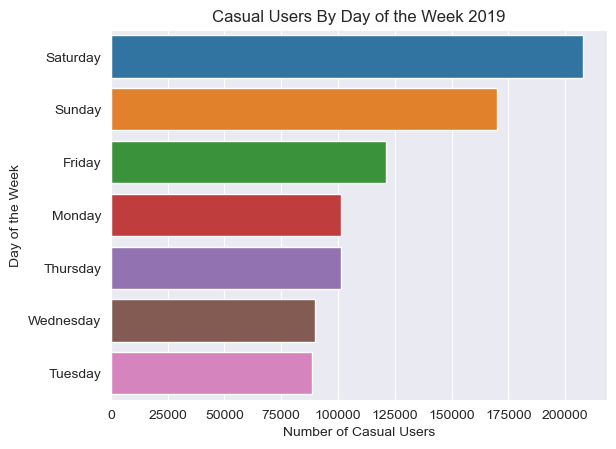

In [21]:
fig = sns.barplot(
       data=weekday_counts,
       y='weekday',
       x='usertype'
)
fig.set(
       title="Casual Users By Day of the Week 2019",
       ylabel="Day of the Week",
       xlabel="Number of Casual Users"
);

#### And finally by `hour`.

In [22]:
hour_counts = casual_trips.groupby(['hour'])['usertype'].count().reset_index()
hour_counts.head()

,hour,usertype
0,0,8204
1,1,5384
2,2,3335
3,3,1925
4,4,1175


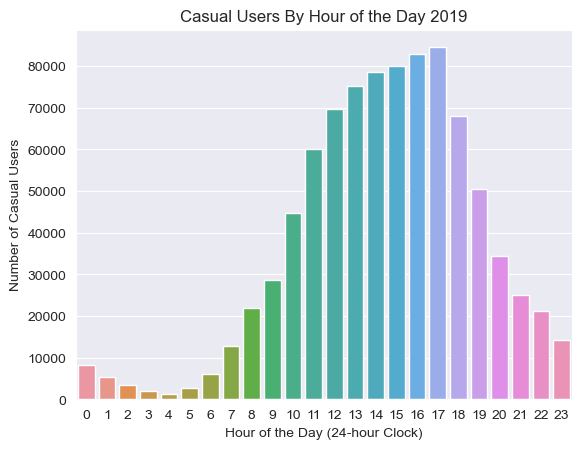

In [23]:
fig = sns.barplot(
       data=hour_counts,
       x='hour',
       y='usertype'
)
fig.set(
       title="Casual Users By Hour of the Day 2019",
       ylabel="Number of Casual Users",
       xlabel="Hour of the Day (24-hour Clock)"
);

#### Lastly, determine the most popular stations for casual users.

In [24]:
station_traffic = casual_trips.groupby(['from_station_name'])['usertype'].count().sort_values(ascending=False).reset_index()
station_traffic.head()

,from_station_name,usertype
0,Streeter Dr & Grand Ave,53104
1,Lake Shore Dr & Monroe St,39238
2,Millennium Park,21749
3,Michigan Ave & Oak St,21388
4,Shedd Aquarium,20617


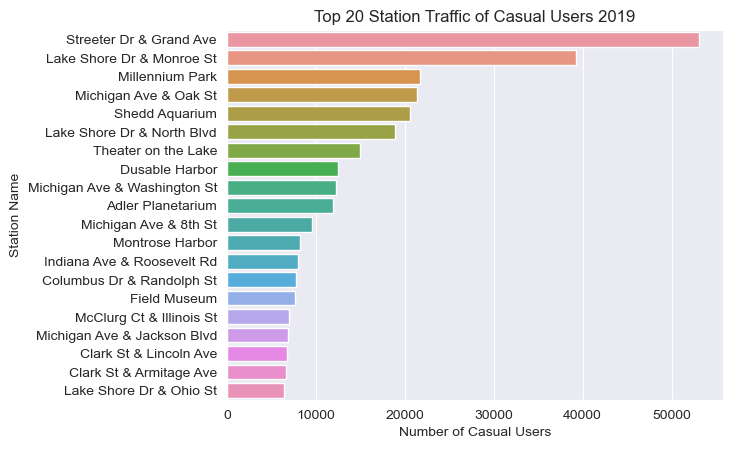

In [25]:
fig = sns.barplot(
       data=station_traffic.head(20),
       y='from_station_name',
       x='usertype'
)
fig.set(
       title="Top 20 Station Traffic of Casual Users 2019",
       ylabel="Station Name",
       xlabel="Number of Casual Users"
);

## Conclusion
It is evident that the number of casual users begins to pick up in the early summer and then tails off in the late fall.
Based on this information it might be prevalent for our client to begin an ad campaign in the early Spring to promote
ride-share memberships to take advantage of the impending 'good' weather months.

On average the busiest days of the week are Fridays, Saturdays, and Sundays, so the client may want to try reducing rates
for the slower days of the week and offering extra incentives to attract more riders on those days. Additionally, the client
would want to implement additional advertising on the weekends since those are the highest traffic times of the casual users.

The peak hours are between 2 PM and 6 PM, so the client should stress membership sales during that period since they
will have the widest casual user exposure during that time frame.

Lastly, listed above are the top 20 stations for casual user traffic. These stations might require deeper analysis to determine
why the ratio of casual users to those who have memberships. The high traffic of casual users makes these stations ideal
for increased membership advertising.
